<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/2%20Logistic%20Regression/Logistic_Regression_Algorithm_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Algorithm and Implement from Scratch

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Algorithm

### Sigmoid Function

Sigmoid function will transform all its input data between 0 and 1.

$f(x) = \displaystyle\frac{1}{1+e^{-x}}$

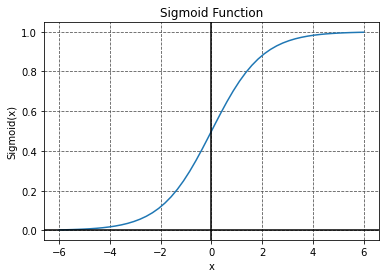

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-6, 6, 50)
fig = plt.figure(figsize=(6,4))  
plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(which='major', color='#555555', linestyle='--')
plt.title('Sigmoid Function')
plt.axvline(x=0, c="k")
plt.axhline(y=0, c="k")
plt.show()

### Hypothesis Function

$\begin{array}{rcl}
h_\theta(X) & = & f(z) \\
 & = & \displaystyle\frac{1}{1+e^{-z}} \\
 & = & \displaystyle\frac{1}{1+e^{-X \cdot \theta}}
\end{array}$


where $z = X \cdot \theta = \theta_0 + \theta_1x_1 + ... + \theta_m x_m$

In [ ]:
def hypothesis(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

### Cross Entropy Cost Function

The Cross Entropy Function is defined as following:


$\qquad cost(h_\theta(x),y) = \left\{ \begin{array}{cl}
−log(h_\theta(x))  & : \ y = 1 \\
−log(1-h_\theta(x)) & : \ y < 0
\end{array} \right.$



In [ ]:
def _cross_entropy(x, y):
    h = sigmoid(x)
    if y == 1:
      return -np.log(h)
    else:
      return -np.log(1 - h)

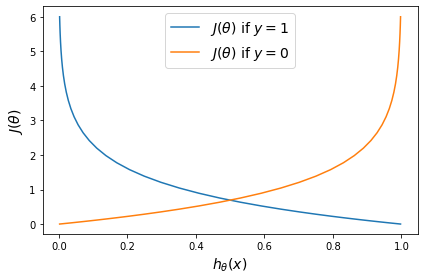

In [ ]:
x = np.linspace(-6, 6, 50)
cost_1 = _cross_entropy(x, y=1)
cost_0 = _cross_entropy(x, y=0)

fig = plt.figure(figsize=(6,4))  
plt.plot(sigmoid(x), cost_1, label=r'$J(\theta)$ if $y=1$')
plt.plot(sigmoid(x), cost_0, label=r'$J(\theta)$ if $y=0$')
plt.xlabel(r'$h_\theta(x)$', fontsize=14)
plt.ylabel(r'$J(\theta)$', fontsize=14)
plt.legend(loc='upper center', fontsize=14)
plt.tight_layout()
plt.show()


The two cost functions (for $y=1$ and $y=0$) can be combined and rewritten as below:

$\qquad J(\theta) = \displaystyle-\frac{1}{n}\sum_{i=1}^{n}[y^{(i)}log(h_{\theta}(x^{(i)})) + (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))] $

In [ ]:
def cross_entropy(x, y):
    h = sigmoid(x)
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

### Gradient

The gradient vector is defined as following:

$\qquad \nabla J(\theta) = \begin{bmatrix}
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_0} \\ 
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_1}  \\ 
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_2} \\ 
... \\
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_m} \\ \end{bmatrix} = 
\begin{bmatrix}
\displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} ) \\ 
\displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} ) x_1^{(i)}  \\ 
\displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} ) x_2^{(i)} \\ 
... \\
\displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} ) x_m^{(i)} \\ \end{bmatrix}$


In [ ]:
def gradient(X, h, y):
    return np.dot(np.transpose(X), (h - y)) / y.shape[0]

## Implementation

In [ ]:
class LogisticRegression:
    def __init__(self, X, y, fit_intercept=True):
        self.y = y.reshape(-1, 1)
        self.X = self._scale(X)
        if fit_intercept:
            self.X = np.hstack((np.ones((self.X.shape[0],1)), self.X))
        self.theta = np.zeros((self.X.shape[1], 1))
        self.fit_intercept = fit_intercept
        self.cost_history = []
        self.epoch_history = []

    def _scale(self, X):
        return (X - np.mean(X, axis=0))/np.std(X, axis=0)

    def _sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    def hypothesis(self, X, theta):
        z = np.dot(X, theta)
        return self._sigmoid(z)
     
    def cross_entropy_cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
     
    def gradient(self, X, h, y):
        return np.dot(np.transpose(X), (h - y)) / y.shape[0]
      
    def fit(self, epochs, alpha):
        for i in range(epochs):
            h = self.hypothesis(self.X, self.theta)
            cost = self.cross_entropy_cost(h, self.y)
            grad = self.gradient(self.X, h, self.y)
            self.theta -= alpha * grad
            self.epoch_history.append(i)
            self.cost_history.append(cost)            

    def predict(self, X, threshold=0.5):
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0],1)), X))
        pred = self.hypothesis(X, self.theta)
        return (pred >= threshold).astype(int).reshape(-1)


### Compare sample dataset

In [ ]:
X, y = datasets.make_classification(
                  n_samples=1000,
                  n_features=12, 
                  n_redundant=0, 
                  n_informative=2, 
                  random_state=1, 
                  n_clusters_per_class=1)
print("X size:", X.shape)
print("y size", y.shape)
print("y classes:", np.unique(y))

X size: (1000, 12)
y size (1000,)
y classes: [0 1]


In [ ]:
X_train, X_test, y_train, y_test = \
      train_test_split(X, y, 
                       train_size = .75, 
                       random_state=1)

In [ ]:
regressor = LogisticRegression(X_train, y_train)
regressor.fit(epochs=6000, alpha=0.01)
y_pred = regressor.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy Score:", a_score)
print("\nConfusion Matrix:\n", c_matrix)


Accuracy Score: 0.888

Confusion Matrix:
 [[112   4]
 [ 24 110]]


In [ ]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy Score:", a_score)
print("\nConfusion Matrix:\n", c_matrix)


Accuracy Score: 0.888

Confusion Matrix:
 [[112   4]
 [ 24 110]]


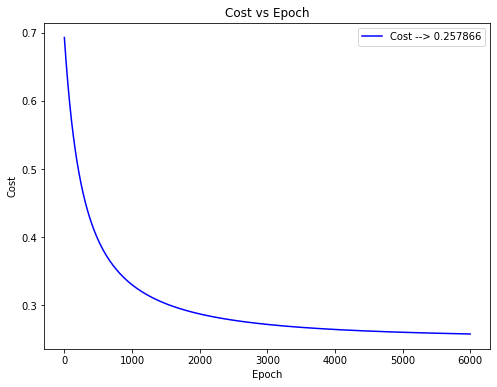

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.title(r'Cost vs Epoch')

plt.plot(regressor.epoch_history, regressor.cost_history, color='b', label="Cost --> %f"%regressor.cost_history[-1])
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.legend(loc='best')
plt.savefig("logistic_regression_from_scratch.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

### Compare brease dataset

In [ ]:
#Loading the data
data = datasets.load_breast_cancer()
 
#Preparing the data
scaler = preprocessing.StandardScaler()
X1 = scaler.fit_transform(data.data) 
y1 = data.target
print(X1.shape)
print(y1.shape)
X_train, X_test, y_train, y_test = \
      train_test_split(X1, y1, 
                       train_size = .75, 
                       random_state=2)

#creating the class Object
regressor = LogisticRegression(X_train, y_train)
regressor.fit(epochs=5000, alpha=0.01)
y_pred = regressor.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy Score:", a_score)
print("\nConfusion Matrix:\n", c_matrix)


(569, 30)
(569,)
Accuracy Score: 0.9790209790209791

Confusion Matrix:
 [[54  2]
 [ 1 86]]


In [ ]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy Score:", a_score)
print("\nConfusion Matrix:\n", c_matrix)


Accuracy Score: 0.972027972027972

Confusion Matrix:
 [[55  1]
 [ 3 84]]


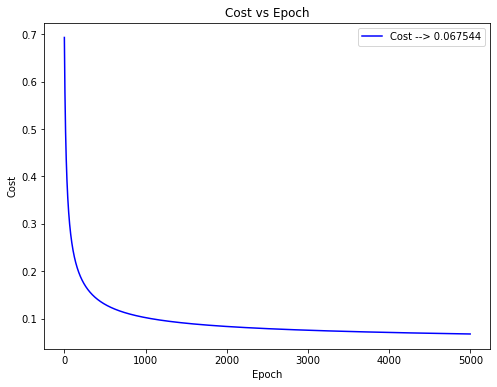

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.title(r'Cost vs Epoch')

plt.plot(regressor.epoch_history, regressor.cost_history, color='b', label="Cost --> %f"%regressor.cost_history[-1])
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.legend(loc='best')
plt.savefig("logistic_regression.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

### Compare IRIS dataset

In [ ]:
iris = datasets.load_iris()
idx = iris.target != 0
X2 = scaler.fit_transform(iris.data[idx]) 
y2 = iris.target[idx]
y2 = y2 - 1

print(X2.shape)
print(y2.shape)
print(np.unique(y2))

(100, 4)
(100,)
[0 1]


In [ ]:
model1 = linear_model.LogisticRegression()
model1.fit(X2, y2)
y2_pred_ = model1.predict(X2)
print("Accuracy Score:", metrics.accuracy_score(y2, y2_pred_))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y2, y2_pred_))


Accuracy Score: 0.96

Confusion Matrix:
 [[47  3]
 [ 1 49]]


In [ ]:
regressor = LogisticRegression(X2,y2)
regressor.fit(epochs=5000, alpha=0.02)
y2_pred = regressor.predict(X2)
print("Accuracy Score:", metrics.accuracy_score(y2, y2_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y2, y2_pred))


Accuracy Score: 0.96

Confusion Matrix:
 [[47  3]
 [ 1 49]]


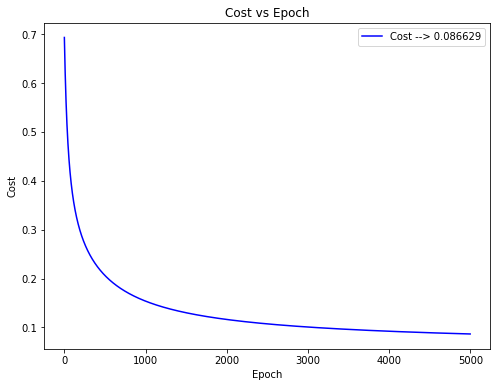

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.title(r'Cost vs Epoch')

plt.plot(regressor.epoch_history, regressor.cost_history, color='b', label="Cost --> %f"%regressor.cost_history[-1])
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.legend(loc='best')
plt.savefig("logistic_regression.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()